# Testing Transport and EOS

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from tabulate import tabulate

from constants import *
from physics import JT_GMS, SMT

from pandas import read_csv
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# CHECK out SMT for λ_dB

# Transport Coefficients

## Electron Thermal Conductivity (Double Check!!!)

#### Carbon from TCCW
We first test our conductivity via comparison with results from TCCW
### "Review of the first charged-particle transport coefficient comparison workshop"
Grabowski et al.


#### The following plot is for $\rho=1$ g/cc

In [4]:
Te = np.geomspace(0.1,1e5)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12

m_i = m_p*A

rho = 1e0*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

ke_tccw_rho1_data = read_csv("data/tccw-1/ke_rho_1e0-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [1.45620556 1.45724953 1.45861413 1.46039694 1.46272466 1.46576131
 1.46971858 1.47486852 1.48155883 1.49023102 1.50144108 1.51588263
 1.53441199 1.55807637 1.58814966 1.62619086 1.67416075 1.73467246
 1.81150911 1.91058364 2.04138364 2.21820469 2.45864344 2.77545445
 3.16310099 3.59204032 4.02078272 4.41445495 4.75388243 5.03400332
 5.25841371 5.43461398 5.57107272 5.67575166 5.75551585 5.81600577
 5.86172128 5.89618462 5.92211775 5.9416057  5.95623568 5.96721055
 5.97543897 5.98160569 5.98622589 5.98968661 5.99227839 5.99421917
 5.99567232 5.99676028]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. Most of the graph is extremely sensitive to exactly what is put in the lnΛ. 

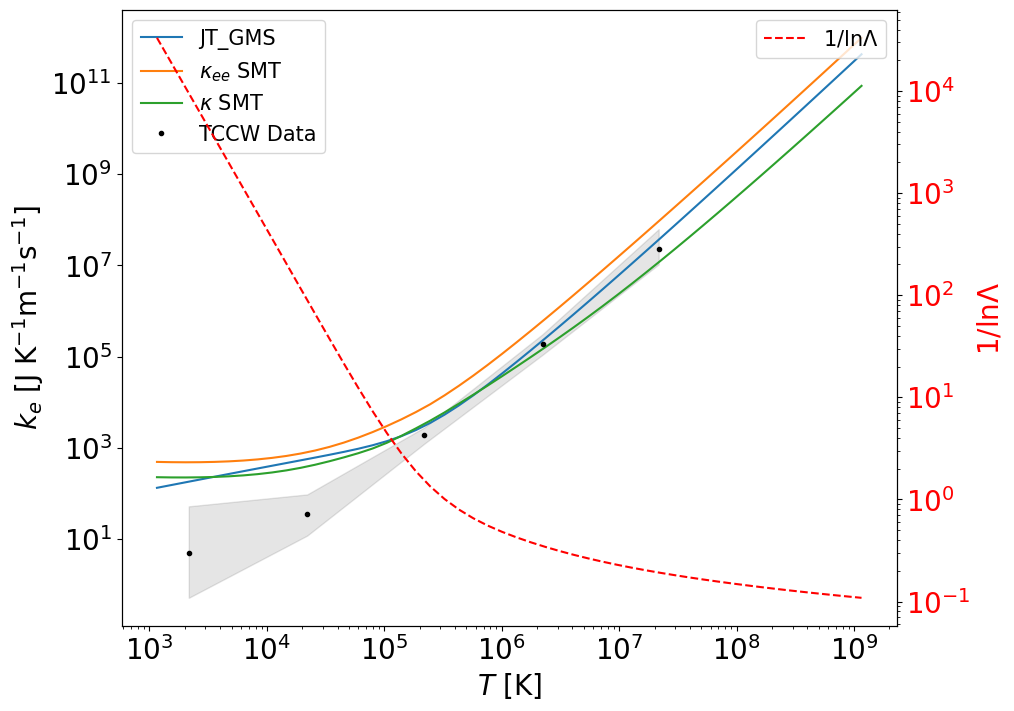

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()

In [4]:
λdB = JT_GMS.electron_deBroglie_wavelength(n_e, Te)
v_F = JT_GMS.Fermi_velocity(n_e, m_e)

np.where(0.6*v_F**2>3*k_B*Te/m_e, Te, 0)


array([1.15942029e+03, 1.53705666e+03, 2.03769348e+03, 2.70139340e+03,
       3.58126794e+03, 4.74772761e+03, 6.29411645e+03, 8.34418172e+03,
       1.10619765e+04, 1.46649880e+04, 1.94415413e+04, 2.57738723e+04,
       3.41687154e+04, 4.52978543e+04, 6.00518803e+04, 7.96114603e+04,
       1.05541818e+05, 1.39917987e+05, 1.85490866e+05, 2.45907349e+05,
       3.26002168e+05, 4.32184779e+05, 5.72952274e+05, 7.59569341e+05,
       1.00696971e+06, 1.33495119e+06, 1.76975996e+06, 2.34619090e+06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [5]:
λ = JT_GMS.electron_classical_quantum_wavelength(n_e, Te)
r_c =  ee**2 /(4*π*ε_0) / (3*k_B*Te)
np.where( λ > r_c, Te, 0 )

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 7.96114603e+04,
       1.05541818e+05, 1.39917987e+05, 1.85490866e+05, 2.45907349e+05,
       3.26002168e+05, 4.32184779e+05, 5.72952274e+05, 7.59569341e+05,
       1.00696971e+06, 1.33495119e+06, 1.76975996e+06, 2.34619090e+06,
       3.11037194e+06, 4.12345543e+06, 5.46651173e+06, 7.24701672e+06,
       9.60745244e+06, 1.27367089e+07, 1.68851997e+07, 2.23849012e+07,
       2.96759179e+07, 3.93417017e+07, 5.21557411e+07, 6.91434587e+07,
       9.16642691e+07, 1.21520363e+08, 1.61100927e+08, 2.13573330e+08,
       2.83136591e+08, 3.75357396e+08, 4.97615566e+08, 6.59694612e+08,
       8.74564645e+08, 1.15942029e+09])

In [6]:
λDb = JT_GMS.electron_Debye_length(n_e, Te)
ae  = JT_GMS.r_WignerSeitz(n_e)
np.log10(np.where(ae>λDb, Te, 0))


/tmp/ipykernel_19264/1249975340.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.where(ae>λDb, Te, 0))


array([3.0642409 , 3.18668988, 3.30913886, 3.43158784, 3.55403681,
       3.67648579, 3.79893477, 3.92138375, 4.04383273, 4.16628171,
       4.28873069, 4.41117967, 4.53362865, 4.65607763, 4.77852661,
       4.90097559, 5.02342457, 5.14587355, 5.26832253, 5.39077151,
       5.51322049,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

#### The following plot is for $\rho=1$ g/cc

In [6]:
Te = np.geomspace(0.1,1e6)/K_to_eV #K
Ti = Te #K

Z, A = 6, 12
m_i = m_p*A

rho = 1e2*1e3 # 
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3

Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)


ke_tccw_rho1_data = read_csv("data/tccw-1/ke_rho_1e2-g_o_cc.txt", delim_whitespace=True,header=1)
T_data  = ke_tccw_rho1_data['T']/K_to_eV
ke_data = ke_tccw_rho1_data['ke']*erg_to_J*1e2
ke_low_data = ke_tccw_rho1_data['ke_up']*erg_to_J*1e2
ke_up_data = ke_tccw_rho1_data['ke_low']*erg_to_J*1e2


Zstar is:  [4.29830777 4.29831276 4.29831959 4.29832894 4.29834174 4.29835928
 4.2983833  4.29841619 4.29846124 4.29852298 4.29860764 4.29872393
 4.29888417 4.29910641 4.29941858 4.29986777 4.30054298 4.30163313
 4.30357977 4.30747906 4.31611577 4.33642487 4.38413976 4.48688997
 4.66849962 4.91137453 5.16082553 5.37548896 5.54370221 5.66975975
 5.76223445 5.82934181 5.87774817 5.91253821 5.93748359 5.95534198
 5.96811292 5.9772388  5.98375649 5.98840965 5.99173078 5.99410073
 5.99579169 5.99699808 5.9978587  5.99847262 5.99891054 5.99922291
 5.99944572 5.99960465]


Now repeated for a lower density, we see a similar issue

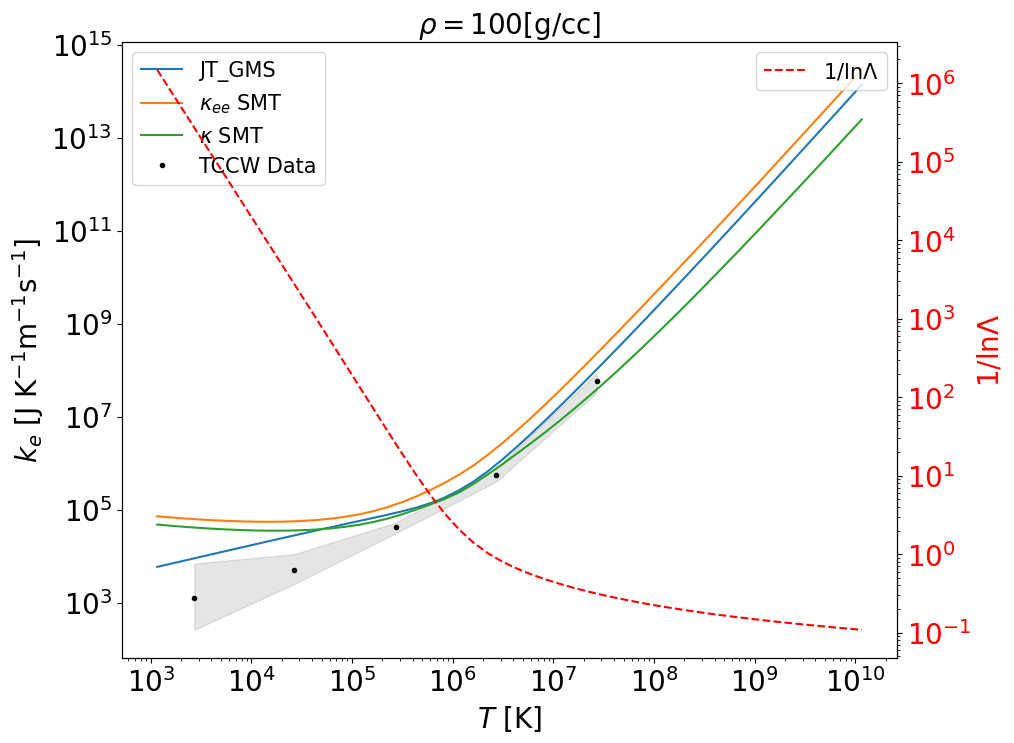

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')
ax.plot(T_data, ke_data,'k.', label="TCCW Data")
ax.fill_between(T_data, ke_low_data,ke_up_data,color='k',alpha=0.1)
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.tick_params(labelsize=20)
ax.legend(fontsize=15)
ax.set_title(r'$\rho=100$[g/cc]',fontsize=20)

ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

# ax.grid()

In [8]:
λ = JT_GMS.electron_classical_quantum_wavelength(n_e, Te)
r_c =  ee**2 /(4*π*ε_0) / (3*k_B*Te)
np.where( λ > r_c, Te, 0 )

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.00236518e+05,
       8.34025938e+05, 1.15887528e+06, 1.61025198e+06, 2.23743788e+06,
       3.10890985e+06, 4.31981623e+06, 6.00236518e+06, 8.34025938e+06,
       1.15887528e+07, 1.61025198e+07, 2.23743788e+07, 3.10890985e+07,
       4.31981623e+07, 6.00236518e+07, 8.34025938e+07, 1.15887528e+08,
       1.61025198e+08, 2.23743788e+08, 3.10890985e+08, 4.31981623e+08,
       6.00236518e+08, 8.34025938e+08, 1.15887528e+09, 1.61025198e+09,
       2.23743788e+09, 3.10890985e+09, 4.31981623e+09, 6.00236518e+09,
       8.34025938e+09, 1.15887528e+10])

In [9]:
λDb = JT_GMS.electron_Debye_length(n_e, Te)
ae  = JT_GMS.r_WignerSeitz(n_e)
np.log10(np.where(ae>λDb, Te, 0))


/tmp/ipykernel_51939/1249975340.py:3: RuntimeWarning: divide by zero encountered in log10
  np.log10(np.where(ae>λDb, Te, 0))


array([3.0640367 , 3.20689384, 3.34975099, 3.49260813, 3.63546527,
       3.77832241, 3.92117956, 4.0640367 , 4.20689384, 4.34975099,
       4.49260813, 4.63546527, 4.77832241, 4.92117956, 5.0640367 ,
       5.20689384, 5.34975099, 5.49260813, 5.63546527, 5.77832241,
       5.92117956, 6.0640367 , 6.20689384, 6.34975099,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf,
             -inf,       -inf,       -inf,       -inf,       -inf])

# Implement Rozsnyai paper Al 2.7g/cc

In [10]:
Te = np.geomspace(0.01,1e5)/K_to_eV #K
Ti = Te #K

Z, A = 13, 27

m_i = m_p*A

rho = 2.7*1e3 # 2.7 g/cc
n_i = rho/m_i#np.geomspace(1e24, 1e28) #1/m^3
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Roz_Te, Roz_ke = np.array([[0.026012289059673396, 18554497.53188056],
[0.1852922021640952, 24447547.247264758],
[0.8930851274991436, 32772382.97867467],
[2.371373705661655, 52197182.20435652],
[6.906940492102073, 137056108.24676672],
[15.085907086001777, 335894744.3068179],
[32.6131581998775, 837518969.4500515],
[63.61674269215422, 2124578231.0305717],
[119.09481582664222, 8012043812.766009],
[229.936090438267, 34089475627.292057],
[497.0826116437389, 175327591700.68683],
[1000, 696274914554.8905]]).T
Roz_Te = Roz_Te/K_to_eV
Roz_ke = Roz_ke*100/(1e3/K_to_eV)


Zstar is:  [ 2.44395942  2.4441523   2.44441637  2.44477791  2.44527285  2.44595034
  2.44687758  2.44814642  2.44988224  2.45225606  2.45550084  2.45993323
  2.4659825   2.4742285   2.48545058  2.50068933  2.52132166  2.54914814
  2.58648693  2.63626402  2.70208399  2.78826778  2.89986724  3.04273818
  3.22391215  3.45278134  3.7439254   4.12220887  4.6280816   5.31263161
  6.20489554  7.26231094  8.36836004  9.39762407 10.27364114 10.97518941
 11.51524066 11.92054884 12.21976948 12.43829084 12.59672386 12.7110261
 12.79321027 12.85216188 12.8943786  12.92457587 12.94615794 12.96157371
 12.97258042 12.9804368 ]


Below we see agreement between SMT and JT_GMS models at very high T, well above the region TCCW probed. The behaviour difference is essentially due to the extremely small $\rm{ln}\Lambda$ parameter, which at the far left of this graph is $\sim 10^{-3}$, representing such strong screening that the idea of a Debye screening length must be completely broken. Most of the graph is extremely sensitive to exactly what is put in the lnΛ. 

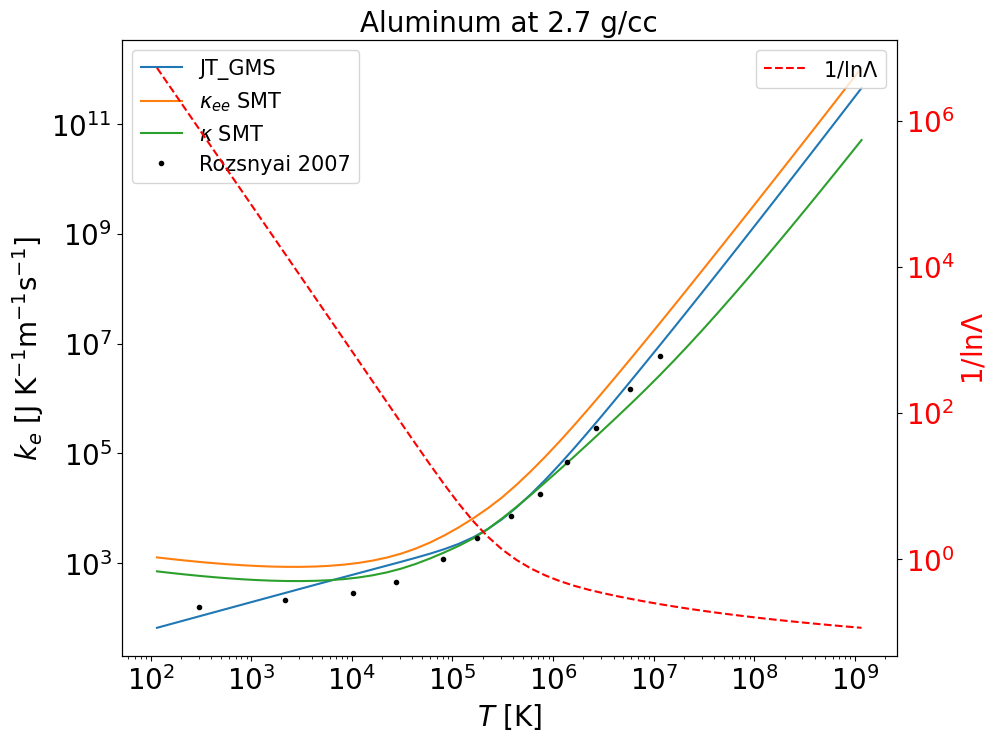

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti),  label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')
ax.plot(Roz_Te, Roz_ke,'k.', label="Rozsnyai 2007")
# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)

ax.set_title("Aluminum at 2.7 g/cc",fontsize=20)
ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20,color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.tick_params(labelsize=20)

ax.legend(fontsize=15)

# ax.grid()

# CLAMS Experiment
## Xe at 5 bar 

We repeat, but for parameters of interest to CLAMS

In [25]:
dTdt_exp, Te_exp = 120e9, 13000#18000 # 350 K/ns
τdiff    = (Te_exp/dTdt_exp) #s

print("Measured Diffusion timescale τ_diff = {0:.2e} s".format(τdiff))

R_exp = 25e-6 # m

Te = np.geomspace(300, Te_exp) #K
Ti = Te #K

Z, A = 54, 131

m_i = m_p*A

n_i = 1.25e20* 1e6 # cc to cm
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Measured Diffusion timescale τ_diff = 1.08e-07 s
Zstar is:  [0.16909423 0.17374511 0.17868208 0.18392038 0.18947588 0.19536517
 0.20160557 0.20821514 0.21521275 0.22261809 0.2304517  0.23873504
 0.24749052 0.25674154 0.26651252 0.27682898 0.28771757 0.29920612
 0.31132372 0.32410073 0.3375689  0.35176137 0.36671276 0.38245926
 0.39903862 0.41649032 0.43485554 0.4541773  0.47450049 0.49587198
 0.51834067 0.54195755 0.56677582 0.59285092 0.62024066 0.64900523
 0.67920733 0.71091224 0.74418787 0.77910485 0.8157366  0.8541594
 0.89445248 0.93669803 0.9809813  1.02739067 1.07601764 1.12695695
 1.18030655 1.23616766]


We see an identical issue here, with agreement only well above the region we are interested in. One could say CLAMS 'favors' JT_GMS here, but really this is probably accidental, since the two models should be at least close. I still can't rule out a bug.

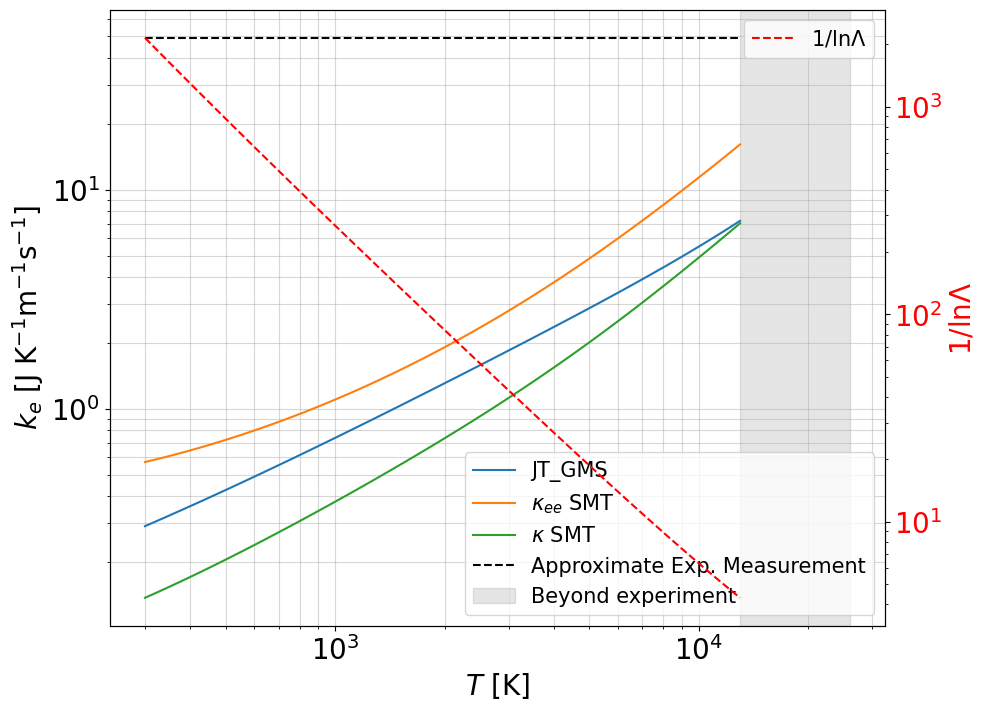

In [26]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti),  label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')

ax.plot(Te, (k_B*n_e[np.argmin(np.abs(Te-Te_exp))]*(50e-6)**2/τdiff)*np.ones_like(Te) ,'k--', label='Approximate Exp. Measurement')

# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)


# ax.vlines(Te_exp,0,1e10,'k', label=r'$T_e$ experiment ')
ax.axvspan(Te_exp,2*Te[-1],color='k',alpha=0.1, label=r'Beyond experiment ')
ax.tick_params(labelsize=20)
ax.legend(fontsize=15)


ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20, color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.grid(which='both',alpha=0.5)

In [27]:
SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)[-1],SMT.electron_heat_capacity(n_e, Te)[-1],Te[-1],R_exp

(16.06460523666348, 3200.08808371417, 13000.0, 2.5e-05)

In [28]:
Te_Xe = Te_exp
ne_Xe = n_e
R_Xe = R_exp
τ_ei_Xe = np.array(SMT.ei_relaxation_times(n_e, n_i, m_i, Zstar, Te, Ti)).T[-1]
dTdt_diff_Xe = ( SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_heat_capacity(n_e, Te)*Te/R_exp**2)[-1]
τ_ei_Xe, dTdt_diff_Xe

(array([1.41791791e-09, 1.14702718e-09]), 104417059837.546)

# Argon at 25 bar

In [29]:
dTdt_exp, Te_exp = 350e9, 15000#18000 # 350 K/ns
τdiff    = (Te_exp/dTdt_exp) #s
print("Measured Diffusion timescale τ_diff = {0:.2e} s".format(τdiff))
R_exp = 50e-6 # m

Te = np.geomspace(300,Te_exp) #K
Ti = Te #K

Z, A = 18, 40

m_i = m_p*A

n_i = 6.3e26
Zstar = JT_GMS.Thomas_Fermi_Zbar(Z, n_i, Te)
n_e = n_i*Zstar
print("Zstar is: ", Zstar)

Measured Diffusion timescale τ_diff = 4.29e-08 s
Zstar is:  [0.22454704 0.22657455 0.22875171 0.23108881 0.23359671 0.23628695
 0.23917168 0.24226375 0.2455767  0.24912479 0.25292303 0.25698719
 0.26133383 0.26598031 0.2709448  0.27624635 0.28190484 0.28794103
 0.29437659 0.30123409 0.30853703 0.31630986 0.32457799 0.3333678
 0.34270669 0.35262304 0.36314628 0.37430687 0.38613635 0.39866732
 0.41193348 0.42596966 0.44081179 0.45649695 0.47306337 0.49055044
 0.50899873 0.52844995 0.54894702 0.57053402 0.59325616 0.61715984
 0.64229256 0.66870293 0.69644063 0.72555634 0.75610174 0.78812942
 0.8216928  0.85684608]


We see an identical issue here, with agreement only well above the region we are interested in. One could say CLAMS 'favors' JT_GMS here, but really this is probably accidental, since the two models should be at least close. I still can't rule out a bug.

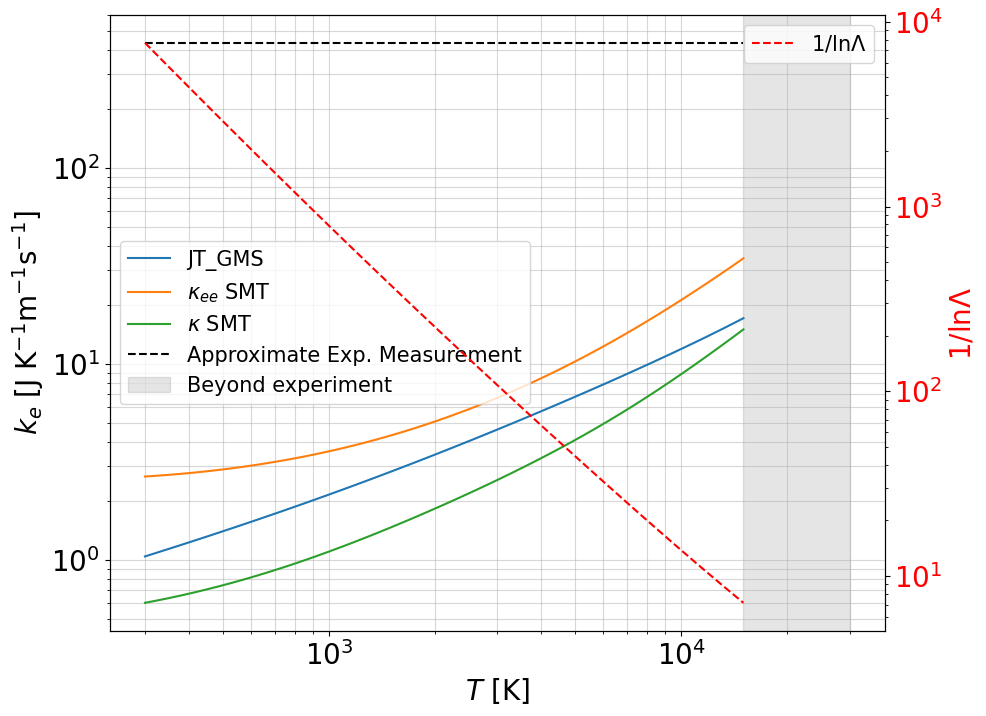

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

ax.plot(Te, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS')
ax.plot(Te, SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti),  label=r'$\kappa_{ee}$ SMT')
ax.plot(Te, SMT.total_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label=r'$\kappa$ SMT')

ax.plot(Te, (k_B*n_e[np.argmin(np.abs(Te-Te_exp))]*(50e-6)**2/τdiff)*np.ones_like(Te) ,'k--', label='Approximate Exp. Measurement')

# ax.plot(n_e, JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti), label='JT_GMS/SMT')
ax.set_yscale('log')
ax.set_xscale('log')
# ax.set_xlabel(r"$n_e$ [1/m$^3$]",fontsize=20)
ax.set_xlabel(r"$T$ [K]",fontsize=20)
ax.set_ylabel("$k_e$ [J K$^{-1}$m$^{-1}$s$^{-1}$]",fontsize=20)


# ax.vlines(Te_exp,0,1e10,'k', label=r'$T_e$ experiment ')
ax.axvspan(Te_exp,2*Te[-1],color='k',alpha=0.1, label=r'Beyond experiment ')
ax.tick_params(labelsize=20)
ax.legend(fontsize=15)


ax2 = ax.twinx()
ax2.plot(Te, 1/JT_GMS.coulomb_logarithm(n_e, n_i, m_i, Zstar, Te, Ti), 'r--', label=r'1/ln$\Lambda$')
ax2.set_yscale('log')
ax2.set_ylabel(r'1/ln$\Lambda$', fontsize=20, color='r')
ax2.tick_params(labelsize=20,labelcolor='r')
ax2.legend(fontsize=15,loc='upper right')

ax.grid(which='both',alpha=0.5)

In [31]:
SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)[-1],SMT.electron_heat_capacity(n_e, Te)[-1],Te[-1],R_exp

(34.55838442996207, 11179.38478108534, 15000.0, 5e-05)

In [32]:
Te_Ar = Te_exp
ne_Ar = n_e
R_Ar = R_exp
τ_ei_Ar = np.array(SMT.ei_relaxation_times(n_e, n_i, m_i, Zstar, Te, Ti)).T[-1]
dTdt_diff_Ar = ( SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)/SMT.electron_heat_capacity(n_e, Te)*Te/R_exp**2)[-1]
τ_ei_Ar, dTdt_diff_Ar

(array([2.29697217e-10, 2.68072905e-10]), 18547559694.930008)

## He at 74 bar (not implemented, density unknown) 

# Clams Experimental Ratios of Gas Parameters 

### Thermalization time

In [33]:
(Te_Ar/Te_Xe)**(7/2), (ne_Ar/ne_Xe)[0]**-1, (R_Ar/R_Xe)**-1 

(1.6501281519456659, 0.14941387428580238, 0.5)

In [34]:
τ_ei_Xe_exp, dTdt_diff_Xe_exp = 1.47e-9, 120e9 #s, K/s
τ_ei_Ar_exp, dTdt_diff_Ar_exp = 380e-12, 348e9 #s, K/s

dT_dt_Ar_estimate = (3*np.sqrt(3)/np.pi * k_B**2.5 * (4*π*ε_0/ee**2)**2 * Te_Ar**3.5 /( np.sqrt(m_e)*ne_Ar*R_Ar**2))[-1]
dT_dt_Xe_estimate = (3*np.sqrt(3)/np.pi * k_B**2.5 * (4*π*ε_0/ee**2)**2 * Te_Xe**3.5 /( np.sqrt(m_e)*ne_Xe*R_Xe**2))[-1]
table = [['', 'Ar (exp)', 'Ar (SMT)', 'Ar (oom)', 'Xe (exp)', ' Xe (SMT)', 'Xe (oom)'],
         ['τ_ei',τ_ei_Ar_exp, τ_ei_Ar[0],'' , τ_ei_Xe_exp, τ_ei_Xe[0],' '],
         ['dT/dt [K/s]', dTdt_diff_Ar_exp,  "{0:.2e}".format(dTdt_diff_Ar), "{0:.2e}".format(dT_dt_Ar_estimate), dTdt_diff_Xe_exp, "{0:.2e}".format(dTdt_diff_Xe), "{0:.2e}".format(dT_dt_Xe_estimate)   ]
        ]
print("Values")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

table = [['', 'Ar/Xe (exp)', 'Ar/Xe (SMT)' ,'Ideal Ratio'],
         ['τ_ei [s] ',τ_ei_Ar_exp/τ_ei_Xe_exp, τ_ei_Ar/τ_ei_Xe, (Te_Ar/Te_Xe)**(3/2) *40/131   ],
         ['dT/dt [K/s]', dTdt_diff_Ar_exp/dTdt_diff_Xe_exp, "{0:.2e}".format(dTdt_diff_Ar/dTdt_diff_Xe) , ((Te_Ar/Te_Xe)**(7/2)*(ne_Ar/ne_Xe)**-1*(R_Ar/R_Xe)**-1 )[-1]]
        ]
print("Ratios of values")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

Values
╒═════════════╤════════════╤═════════════╤════════════╤════════════╤═════════════╤════════════╕
│             │   Ar (exp) │    Ar (SMT) │ Ar (oom)   │   Xe (exp) │    Xe (SMT) │ Xe (oom)   │
╞═════════════╪════════════╪═════════════╪════════════╪════════════╪═════════════╪════════════╡
│ τ_ei        │   3.8e-10  │ 2.29697e-10 │            │   1.47e-09 │ 1.41792e-09 │            │
├─────────────┼────────────┼─────────────┼────────────┼────────────┼─────────────┼────────────┤
│ dT/dt [K/s] │   3.48e+11 │ 1.85e+10    │ 7.10e+09   │   1.2e+11  │ 1.04e+11    │ 6.01e+10   │
╘═════════════╧════════════╧═════════════╧════════════╧════════════╧═════════════╧════════════╛
Ratios of values
╒═════════════╤═══════════════╤═════════════════════════╤═══════════════╕
│             │   Ar/Xe (exp) │ Ar/Xe (SMT)             │   Ideal Ratio │
╞═════════════╪═══════════════╪═════════════════════════╪═══════════════╡
│ τ_ei [s]    │      0.258503 │ [0.16199613 0.23371103] │      0.378452 │
├───────

# Comparison To George
Input:

 Z    = 18

 Mi   = 39.950

 rho  =6.670e+00 [kg/m^3]

 ni   =1.479e-05 [a.u.]

 Rws  =2.527e+01 [a.u.]

 V    =6.760e+04 [a.u.]

 Te   =3.675e-02 [a.u.]
 
 Output:

Transport parameters:

 n_mom           =1.854e-03 [a.u.]

n_tot           =7.073e-03 [a.u.]

el. conductivity=7.419e-03 [a.u.]

th. conductivity=6.584e-04 [a.u.]

L               =2.415e+00 [a.u.]

G               =4.103e-13 [a.u.]

m               =-1.745e-01 [a.u.]

 P               =8.82e-05 [Mbar] (electron only)

 Ne(bound)       = 17.365

 Ne(scatt)       =  0.570 (this is <Z>)

Ne(quasi)       =  0.000

 Ne(TF)          =  0.589

In [23]:
Te = 3.675e-2*AU_energy_to_eV/K_to_eV
Ti = Te  
Z, A = 18,40

m_i = m_p*A
Zstar = Z - 17.365
n_i = 1.479e-5/a_B**3
n_e = Zstar* n_i
Zstar, n_i, Te, SMT.Thomas_Fermi_Zbar(Z, n_i, Ti)

(0.6350000000000016,
 9.980786717513953e+25,
 11588.374429764124,
 0.8433965248109373)

In [9]:
G_GP   = 4.103e-13*k_B/a_B**3/AU_time_to_s
G_SMT = SMT.ei_coupling_factor(n_e, n_i, m_i, Zstar, Te, Ti)
G_JT  = JT_GMS.ei_coupling_factor(n_e, n_i, m_i, Zstar, Te, Ti)

κ_GP  = 6.584e-4*k_B / a_B / AU_time_to_s
κ_SMT = SMT.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)
κ_JT  = JT_GMS.electron_thermal_conductivity(n_e, n_i, m_i, Zstar, Te, Ti)

table = [['', 'GP AA', 'SMT', 'JT GMS'],
         ['κ [J/(K m s)]'  ,κ_GP, κ_SMT, κ_JT],
         ['G [J/(K s m^3)]',G_GP, G_SMT, G_JT ]
        ]
print("Values")
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


Values
╒═════════════════╤═════════════╤═════════════╤═════════════╕
│                 │       GP AA │         SMT │      JT GMS │
╞═════════════════╪═════════════╪═════════════╪═════════════╡
│ κ [J/(K m s)]   │ 7.095       │ 9.46349     │ 4.23213     │
├─────────────────┼─────────────┼─────────────┼─────────────┤
│ G [J/(K s m^3)] │ 1.57893e+12 │ 1.84626e+12 │ 1.48442e+12 │
╘═════════════════╧═════════════╧═════════════╧═════════════╛


# Ionization

In [41]:
from scipy.optimize import root

#x**2/(1-x),
Te, Ti = 1e4, 1e4
g1=2.5
λ =hbar*π / np.sqrt(π*m_e*k_B*Te)
χ_in_K = 12.1/K_to_eV
n0=6e26
saha = lambda x: x**2/(1-x) - 2*g1/(n0*λ**3)*np.exp(-χ_in_K/Ti)

root(saha, 0.1).x


array([0.00043027])

# Neutral Scattering 

Reasonable estimates put argon-electron scattering cross sections in the $$\sigma_{en}\sim  \rm 2-3 \times 10^{-16} \rm cm^2 \sim 10 a_B^2$$ 
at $6000$ K, based on [Daiber & Waldefront](https://journals.aps.org/pr/abstract/10.1103/PhysRev.151.51)

We have $$\nu_{en} \sim \bar{v}_e \sigma_{en} n_n $$ as the collision rate for electrons hitting neutral Argon molecules

In [59]:
print("Measurement is τ_diff= {0:.3e} s".format(τdiff))
print("Measurement is τ_ei= {0:.3e} s".format(380e-12))

Measurement is τ_diff= 3.714e-08 s
Measurement is τ_ei= 3.800e-10 s


In electron-ion collision, 

2 m_e v_e = m_i v_i
4 m_e^2 v_e^2 = m_i^2 v_i^2
4 m_e T_e = m_i E_i


In [43]:
ve = JT_GMS.electron_thermal_velocity(Te)

In [52]:
σ_c = ( ee**2/(4*π*ε_0)/(k_B*Te)  )**2
τei_rough  = 1 / (ve* σ_c * n_i * m_e/m_i)
τei_rough

array([3.22446479e-13, 3.65502911e-13, 4.14308689e-13, 4.69631526e-13,
       5.32341648e-13, 6.03425482e-13, 6.84001175e-13, 7.75336178e-13,
       8.78867188e-13, 9.96222743e-13, 1.12924884e-12, 1.28003798e-12,
       1.45096206e-12, 1.64470972e-12, 1.86432859e-12, 2.11327328e-12,
       2.39545967e-12, 2.71532654e-12, 3.07790539e-12, 3.48889957e-12,
       3.95477399e-12, 4.48285685e-12, 5.08145486e-12, 5.75998396e-12,
       6.52911737e-12, 7.40095352e-12, 8.38920638e-12, 9.50942111e-12,
       1.07792187e-11, 1.22185729e-11, 1.38501247e-11, 1.56995385e-11,
       1.77959054e-11, 2.01722011e-11, 2.28658048e-11, 2.59190866e-11,
       2.93800746e-11, 3.33032100e-11, 3.77502035e-11, 4.27910062e-11,
       4.85049097e-11, 5.49817934e-11, 6.23235385e-11, 7.06456304e-11,
       8.00789751e-11, 9.07719589e-11, 1.02892782e-10, 1.16632104e-10,
       1.32206045e-10, 1.49859581e-10])

In [60]:
σ_c, 10*a_B**2

(array([3.09152654e-15, 2.61574484e-15, 2.21318529e-15, 1.87257910e-15,
        1.58439174e-15, 1.34055602e-15, 1.13424629e-15, 9.59687337e-16,
        8.11992770e-16, 6.87028195e-16, 5.81295497e-16, 4.91834916e-16,
        4.16142196e-16, 3.52098482e-16, 2.97911007e-16, 2.52062911e-16,
        2.13270774e-16, 1.80448694e-16, 1.52677887e-16, 1.29180970e-16,
        1.09300195e-16, 9.24790449e-17, 7.82466465e-17, 6.62045948e-17,
        5.60157983e-17, 4.73950436e-17, 4.01010113e-17, 3.39295206e-17,
        2.87078138e-17, 2.42897206e-17, 2.05515659e-17, 1.73887080e-17,
        1.47126097e-17, 1.24483592e-17, 1.05325738e-17, 8.91162508e-18,
        7.54013818e-18, 6.37972124e-18, 5.39789088e-18, 4.56716286e-18,
        3.86428275e-18, 3.26957493e-18, 2.76639183e-18, 2.34064791e-18,
        1.98042540e-18, 1.67564065e-18, 1.41776184e-18, 1.19957024e-18,
        1.01495802e-18, 8.58757372e-19]),
 2.800285205390781e-20)

In [85]:
τee = JT_GMS.ee_relaxation_time( n_e, n_i, m_i, Zstar, Te, Ti)
τei = JT_GMS.ei_relaxation_times( n_e, n_i, m_i, Zstar, Te, Ti)
τen_1 = 1/( ve* (10 * a_B**2) * n_i * m_e/m_i)
τen_2 = τei * (1.3e11/Te**2)
τin = 1/(2.6e-9*n_i*1e-6 *np.sqrt(1e-24/(0.5*m_i*1e3)) )

print("τei ~ {0:.3e} s, {1:.3e} s, {2:.3e} s".format(τei[0][0],τei[1][0], τei_rough[0]))
print("τen ~ {0:.3e} s, {1:.3e} s, {2:.3e} s".format(τen_1[0],τen_2[0][0],τen_2[1][0]))
print("τin ~ {0:.3e} s".format(τin))

τei ~ 5.799e-10 s, 2.582e-09 s, 3.224e-13 s
τen ~ 3.560e-08 s, 8.376e-04 s, 3.730e-03 s
τin ~ 3.528e-12 s


In [86]:
(τin*JT_GMS.electron_thermal_velocity(Ti) )[0], (τee*ve)[0],  (τee*ve*np.sqrt(m_i/m_e))[0]


(4.1197952840432704e-07, 9.126303959064287e-09, 2.47137507716129e-06)

In [67]:
τen_1[0], τen_2[0] 

(3.559822563111855e-08,
 array([8.37562269e-04, 7.17131014e-04, 6.14075051e-04, 5.25832998e-04,
        4.50234920e-04, 3.85440098e-04, 3.29885014e-04, 2.82239834e-04,
        2.41371971e-04, 2.06315547e-04, 1.76245777e-04, 1.50457459e-04,
        1.28346886e-04, 1.09396639e-04, 9.31627519e-05, 7.92639052e-05,
        6.73722799e-05, 5.72058276e-05, 4.85217167e-05, 4.11107695e-05,
        3.47927314e-05, 2.94122386e-05, 2.48353766e-05, 2.09467341e-05,
        1.76468776e-05, 1.48501810e-05, 1.24829563e-05, 1.04818412e-05,
        8.79240467e-06, 7.36794016e-06, 6.16841888e-06, 5.15958133e-06,
        4.31214824e-06, 3.60113480e-06, 3.00525472e-06, 2.50640245e-06,
        2.08920362e-06, 1.74062507e-06, 1.44963698e-06, 1.20692055e-06,
        1.00461558e-06, 8.36102860e-07, 6.95816947e-07, 5.79085469e-07,
        4.81991473e-07, 4.01255783e-07, 3.34136696e-07, 2.78344653e-07,
        2.31969808e-07, 1.93420688e-07]))